In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
image_path = "C:\\Users\\arpit\\OneDrive\\Desktop\\Football_Analysis\\cropped_images\\player_2.jpg"

In [3]:
img = cv2.imread(image_path)

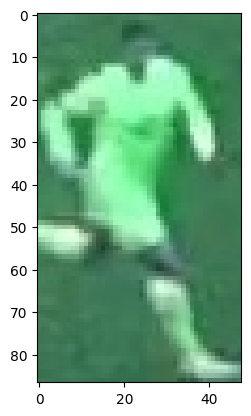

In [4]:
plt.imshow(img)

In [ ]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

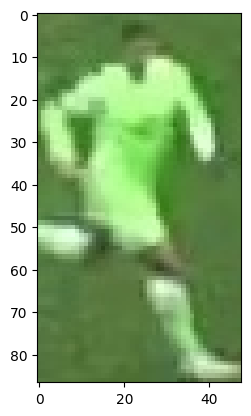

In [7]:
plt.imshow(image)

# Take Top Half of the Image

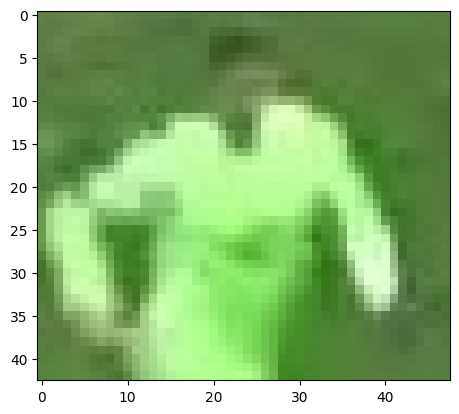

In [10]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)

# Cluster the image into 2 clusters

In [12]:
## reshaping the image into 2d array of pixels

image_2d = top_half_image.reshape(-1,3)

In [14]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(image_2d)

KMeans(n_clusters=2, random_state=0)

In [15]:
labels = kmeans.labels_

In [17]:
labels

array([1, 1, 1, ..., 1, 1, 1], shape=(2064,), dtype=int32)

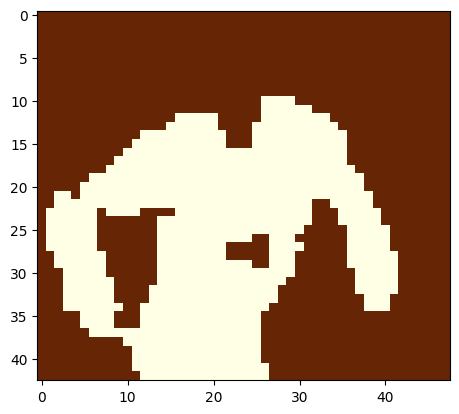

In [31]:
clustered_image = labels.reshape(top_half_image.shape[0],top_half_image.shape[1])
plt.imshow(clustered_image, cmap='YlOrBr')

In [39]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]

In [40]:
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)
print("Non-player clusters:", non_player_clusters)

player_cluster = 1 - non_player_clusters
print("Player cluster:", player_cluster)

Non-player clusters: 1
Player cluster: 0


In [43]:
kmeans.cluster_centers_[player_cluster]

array([171.        , 235.38389262, 142.37718121])

In [44]:
kmeans.cluster_centers_[non_player_clusters]

array([ 86.22213798, 130.66186505,  61.85291888])

In [46]:
print("Player Colors:", kmeans.cluster_centers_[player_cluster])
print("Player Cluster:", player_cluster)
print()
print("Non-Player Colors:", kmeans.cluster_centers_[non_player_clusters])
print("Non-Player Cluster:", non_player_clusters)

Player Colors: [171.         235.38389262 142.37718121]
Player Cluster: 0

Non-Player Colors: [ 86.22213798 130.66186505  61.85291888]
Non-Player Cluster: 1
